In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Environment settings
NUM_BANDWIDTH_STATES = 10
NUM_TRAFFIC_STATES = 5
NUM_ACTIONS = 3  # 0: Increase, 1: Decrease, 2: Maintain

In [3]:
# Q-Learning parameters
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_min = 0.01  # Minimum exploration rate
epsilon_decay = 0.99  # Decay rate for exploration
episodes = 1000
max_steps = 50  # Maximum steps per episode

In [4]:
# Initialize Q-table
q_table = np.zeros((NUM_BANDWIDTH_STATES, NUM_TRAFFIC_STATES, NUM_ACTIONS))

In [5]:
# Reward function
def calculate_reward(bandwidth_state, traffic_state):
    if traffic_state < 2 and bandwidth_state >= 2:
        return -1  # Too much bandwidth for low traffic
    elif traffic_state >= 3 and bandwidth_state < 3:
        return -1  # Not enough bandwidth for high traffic
    else:
        return 1  # Balanced state

In [6]:
# Epsilon-greedy action selection
def choose_action(state):
    if np.random.rand() <= epsilon:
        return random.randint(0, NUM_ACTIONS - 1)  # Random action (explore)
    return np.argmax(q_table[state])  # Best action (exploit)

In [7]:
# Update Q-table
def update_q_table(state, action, reward, next_state):
    best_future_q = np.max(q_table[next_state])
    q_table[state][action] += alpha * (reward + gamma * best_future_q - q_table[state][action])

In [8]:
# Run Q-learning algorithm
reward_list = []
for episode in range(episodes):
    # Initialize the state
    bandwidth_state = random.randint(0, NUM_BANDWIDTH_STATES - 1)
    traffic_state = random.randint(0, NUM_TRAFFIC_STATES - 1)
    total_reward = 0
    
    for step in range(max_steps):
        state = (bandwidth_state, traffic_state)
        action = choose_action(state)
        
        # Determine next state
        if action == 0:  # Increase bandwidth
            bandwidth_state = min(bandwidth_state + 1, NUM_BANDWIDTH_STATES - 1)
        elif action == 1:  # Decrease bandwidth
            bandwidth_state = max(bandwidth_state - 1, 0)
        # Maintain bandwidth (no change)

        # Simulate traffic change
        traffic_state = np.clip(traffic_state + random.choice([-1, 0, 1]), 0, NUM_TRAFFIC_STATES - 1)

        # Calculate reward
        reward = calculate_reward(bandwidth_state, traffic_state)
        total_reward += reward
        
        # Update Q-table
        update_q_table(state, action, reward, (bandwidth_state, traffic_state))

    # Update epsilon after each episode
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    reward_list.append(total_reward)
    print(f"Episode {episode + 1}/{episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.2f}")

Episode 1/1000, Total Reward: -28, Epsilon: 0.99
Episode 2/1000, Total Reward: 0, Epsilon: 0.98
Episode 3/1000, Total Reward: 10, Epsilon: 0.97
Episode 4/1000, Total Reward: 8, Epsilon: 0.96
Episode 5/1000, Total Reward: -2, Epsilon: 0.95
Episode 6/1000, Total Reward: 10, Epsilon: 0.94
Episode 7/1000, Total Reward: -4, Epsilon: 0.93
Episode 8/1000, Total Reward: -38, Epsilon: 0.92
Episode 9/1000, Total Reward: 34, Epsilon: 0.91
Episode 10/1000, Total Reward: -14, Epsilon: 0.90
Episode 11/1000, Total Reward: 0, Epsilon: 0.90
Episode 12/1000, Total Reward: 24, Epsilon: 0.89
Episode 13/1000, Total Reward: -8, Epsilon: 0.88
Episode 14/1000, Total Reward: 6, Epsilon: 0.87
Episode 15/1000, Total Reward: 28, Epsilon: 0.86
Episode 16/1000, Total Reward: 46, Epsilon: 0.85
Episode 17/1000, Total Reward: 40, Epsilon: 0.84
Episode 18/1000, Total Reward: 26, Epsilon: 0.83
Episode 19/1000, Total Reward: 0, Epsilon: 0.83
Episode 20/1000, Total Reward: 30, Epsilon: 0.82
Episode 21/1000, Total Reward: 

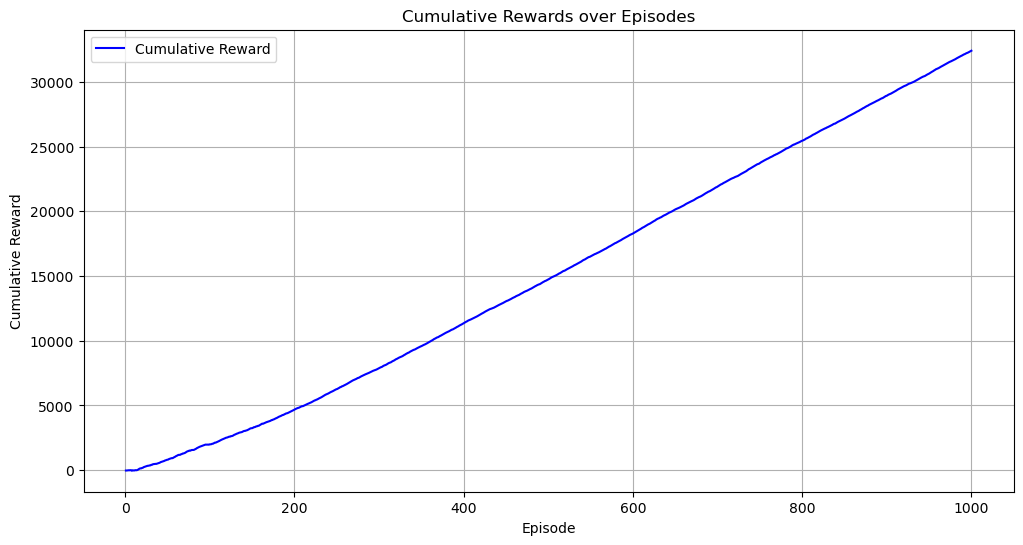

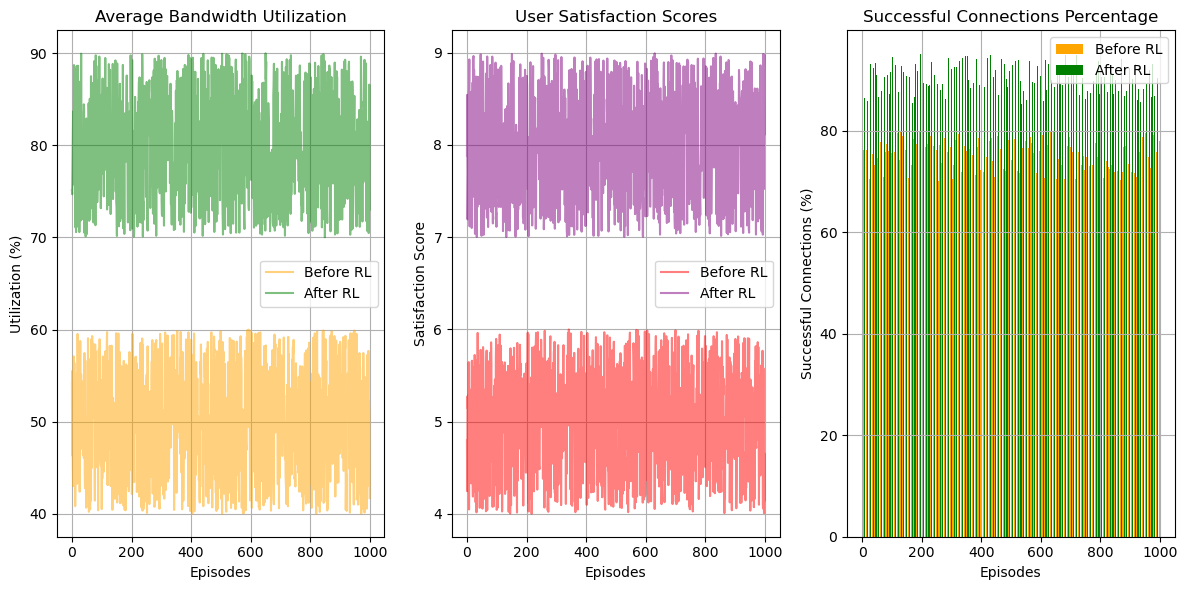

In [9]:
# Plot cumulative rewards over episodes
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, episodes + 1), np.array(reward_list).cumsum(), label='Cumulative Reward', color='blue')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Rewards over Episodes")
plt.grid()
plt.legend()
plt.show()

# Performance metrics (for demonstration, using simulated data)
# Average bandwidth utilization (before and after)
average_bandwidth_utilization_before = np.random.uniform(low=40, high=60, size=episodes)
average_bandwidth_utilization_after = np.random.uniform(low=70, high=90, size=episodes)

# User satisfaction scores
user_satisfaction_before = np.random.uniform(low=4, high=6, size=episodes)
user_satisfaction_after = np.random.uniform(low=7, high=9, size=episodes)

# Successful connections (percentage)
successful_connections_before = np.random.uniform(low=70, high=80, size=episodes)
successful_connections_after = np.random.uniform(low=85, high=95, size=episodes)

# Plotting performance metrics
plt.figure(figsize=(12, 6))

# Average Bandwidth Utilization
plt.subplot(1, 3, 1)
plt.plot(average_bandwidth_utilization_before, label='Before RL', color='orange', alpha=0.5)
plt.plot(average_bandwidth_utilization_after, label='After RL', color='green', alpha=0.5)
plt.title('Average Bandwidth Utilization')
plt.xlabel('Episodes')
plt.ylabel('Utilization (%)')
plt.legend()
plt.grid()

# User Satisfaction Scores
plt.subplot(1, 3, 2)
plt.plot(user_satisfaction_before, label='Before RL', color='red', alpha=0.5)
plt.plot(user_satisfaction_after, label='After RL', color='purple', alpha=0.5)
plt.title('User Satisfaction Scores')
plt.xlabel('Episodes')
plt.ylabel('Satisfaction Score')
plt.legend()
plt.grid()

# Successful Connections Comparison
plt.subplot(1, 3, 3)
plt.bar(np.arange(episodes) - 0.2, successful_connections_before, 0.4, label='Before RL', color='orange')
plt.bar(np.arange(episodes) + 0.2, successful_connections_after, 0.4, label='After RL', color='green')
plt.title('Successful Connections Percentage')
plt.xlabel('Episodes')
plt.ylabel('Successful Connections (%)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
